In [1]:
import numpy as np
import matplotlib.pyplot as plt

from local_framework import local_framework

In [2]:
# simulation length
NT = 1
# dt
dt_stim = 0.1/1000 
# time vector
time = np.arange(dt_stim, NT + dt_stim, dt_stim) 
# num time bins
nt = len(time) 

In [3]:
# create our 1D stimulus
stim = np.zeros((1, nt))
stim[:, int(0.25/dt_stim):int(0.45/dt_stim)] = 25
stim[:, int(0.65/dt_stim):int(0.85/dt_stim)] = -50

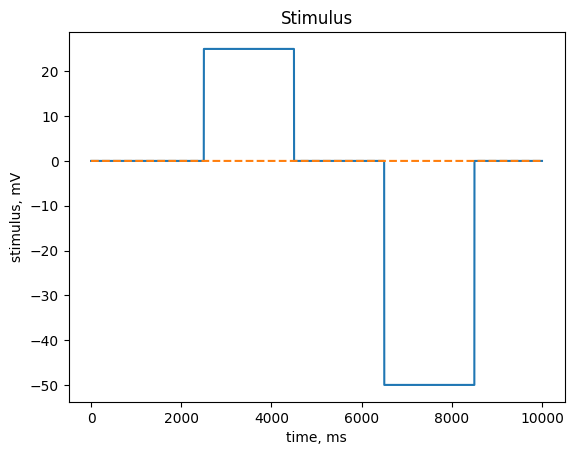

In [4]:
plt.plot(stim.flatten())
plt.plot(np.zeros(len(time)), '--')
#plt.tick_params_1(labelbottom = False) 
plt.ylabel("stimulus, mV")
plt.xlabel("time, ms")
plt.title("Stimulus")
plt.show()

In [5]:
# parameters for simulation # 1
params_1 = {"N" : 400, "w_mean" : 0.1 * np.ones((1,1)), "w_sig" : 0.01, "F_max" : 100, "alpha": 1000, "F_min" : 1, "tau_d": 10, "A": np.zeros((1,1)), "mu": 0, "time_delay" : 0}

# parameters for simulation # 2
params_2 = {"N" : 400, "w_mean" : 0.1 * np.ones((1,1)), "w_sig" : 0.01, "F_max" : 100, "alpha": 100, "F_min" : 1, "tau_d": 10, "A": np.zeros((1,1)), "mu": 0, "time_delay" : 0}

# parameters for simulation # 3
params_3 = {"N" : 400, "w_mean" : 0.1 * np.ones((1,1)), "w_sig" : 0.01, "F_max" : 10, "alpha": 1000, "F_min" : 1, "tau_d": 10, "A": np.zeros((1,1)), "mu": 0, "time_delay" : 0}

# parameters for simulation # 4
params_4 = {"N" : 400, "w_mean" : 0.1 * np.ones((1,1)), "w_sig" : 0.01, "F_max" : 100, "alpha": 1000, "F_min" : 0, "tau_d": 10, "A": np.zeros((1,1)), "mu": 0, "time_delay" : 0}

In [6]:
ss_1, xh_1, xx_1 = local_framework(stim = stim, dt = dt_stim, params = params_1)

ss_2, xh_2, xx_2 = local_framework(stim = stim, dt = dt_stim, params = params_2)

ss_3, xh_3, xx_3 = local_framework(stim = stim, dt = dt_stim, params = params_3)

ss_4, xh_4, xx_4 = local_framework(stim = stim, dt = dt_stim, params = params_4)

In [7]:
def return_spiked_neurons_indices(ss, N):
    # inhibitory spikes
    ind_inh = np.argwhere(ss[1:int(N/2) + 1,:])
    i_inh = ind_inh[:,0] 
    j_inh = ind_inh[:,1]

    # excitatory spikes
    ind_exc = np.argwhere(ss[int(N/2):N,:])
    i_exc = ind_exc[:,0]
    j_exc = ind_exc[:,1]

    i_exc += 200 # to have a nice layout of the plot, otherwise excitatory spikes will be mixed with inhibitory ones

    return i_inh, j_inh, i_exc, j_exc 

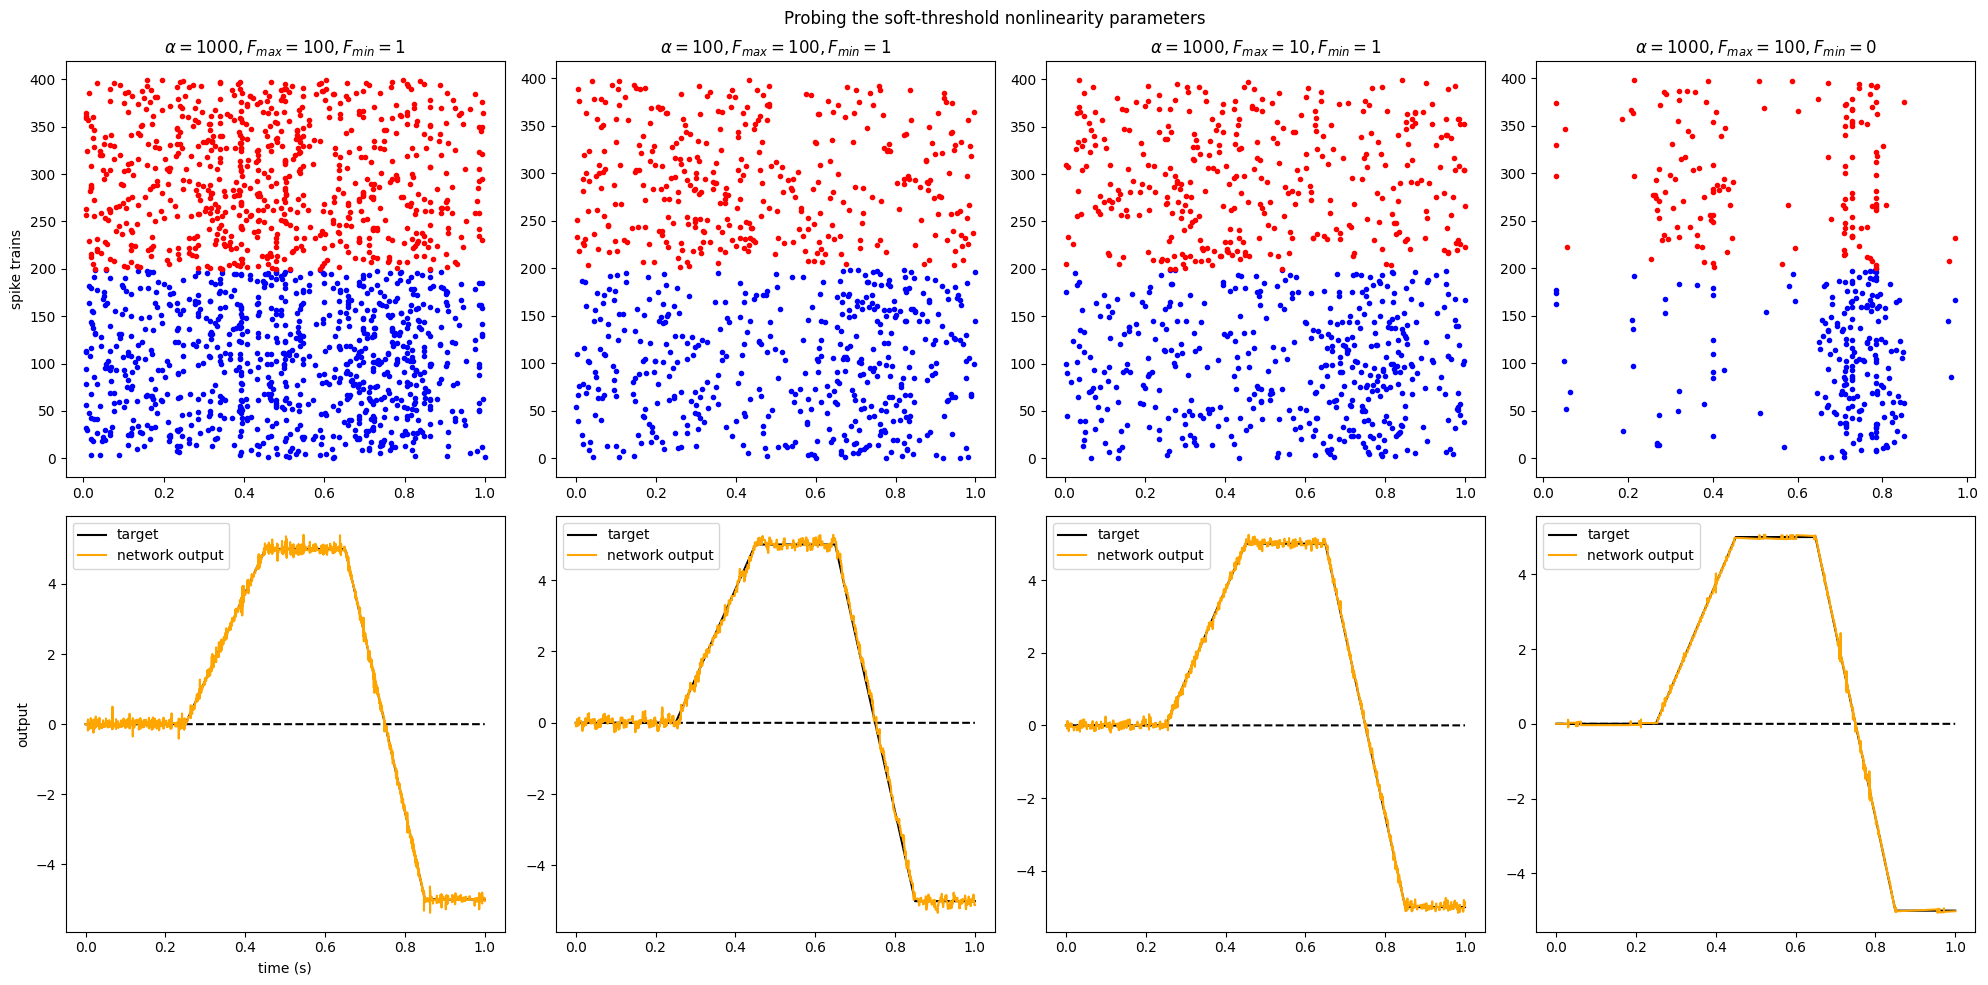

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Raster plots of inh/exc spikes
i_inh_1, j_inh_1, i_exc_1, j_exc_1 = return_spiked_neurons_indices(ss_1, params_1["N"])
axes[0, 0].plot(j_inh_1 * dt_stim, i_inh_1, ".", c = "blue")
axes[0, 0].plot(j_exc_1 * dt_stim, i_exc_1, ".", c = "red")
axes[0, 0].set_title(r"$\alpha = 1000, F_{max} = 100, F_{min} = 1$")
axes[0, 0].set_ylabel("spike trains")

i_inh_2, j_inh_2, i_exc_2, j_exc_2 = return_spiked_neurons_indices(ss_2, params_2["N"])
axes[0, 1].plot(j_inh_2 * dt_stim, i_inh_2, ".", c = "blue")
axes[0, 1].plot(j_exc_2 * dt_stim, i_exc_2, ".", c = "red")
axes[0, 1].set_title(r"$\alpha = 100, F_{max} = 100, F_{min} = 1$")

i_inh_3, j_inh_3, i_exc_3, j_exc_3 = return_spiked_neurons_indices(ss_3, params_3["N"])
axes[0, 2].plot(j_inh_3 * dt_stim, i_inh_3, ".", c = "blue")
axes[0, 2].plot(j_exc_3 * dt_stim, i_exc_3, ".", c = "red")
axes[0, 2].set_title(r"$\alpha = 1000, F_{max} = 10, F_{min} = 1$")

i_inh_4, j_inh_4, i_exc_4, j_exc_4 = return_spiked_neurons_indices(ss_4, params_4["N"])
axes[0, 3].plot(j_inh_4 * dt_stim, i_inh_4, ".", c = "blue")
axes[0, 3].plot(j_exc_4 * dt_stim, i_exc_4, ".", c = "red")
axes[0, 3].set_title(r"$\alpha = 1000, F_{max} = 100, F_{min} = 0$")

# Plots of the target dynamics and our approximation
axes[1, 0].plot(time, np.zeros(len(time)), "--", c = "black")
axes[1, 0].plot(time, xx_1.flatten(), c = "black", label = "target")
axes[1, 0].plot(time, xh_1.flatten(), "-", c = "orange", label = "network output")
axes[1, 0].legend()
axes[1, 0].set_xlabel("time (s)")
axes[1, 0].set_ylabel("output")

axes[1, 1].plot(time, np.zeros(len(time)), "--", c = "black")
axes[1, 1].plot(time, xx_2.flatten(), c = "black", label = "target")
axes[1, 1].plot(time, xh_2.flatten(), "-", c = "orange", label = "network output")
axes[1, 1].legend()

axes[1, 2].plot(time, np.zeros(len(time)), "--", c = "black")
axes[1, 2].plot(time, xx_3.flatten(), c = "black", label = "target")
axes[1, 2].plot(time, xh_3.flatten(), "-", c = "orange", label = "network output")
axes[1, 2].legend()

axes[1, 3].plot(time, np.zeros(len(time)), "--", c = "black")
axes[1, 3].plot(time, xx_4.flatten(), c = "black", label = "target")
axes[1, 3].plot(time, xh_4.flatten(), "-", c = "orange", label = "network output")
axes[1, 3].legend()

plt.suptitle("Probing the soft-threshold nonlinearity parameters")
plt.tight_layout()
plt.show()